In [16]:
%cd '/home/urbanaq/cams_downscaling'

/home/urbanaq/cams_downscaling


In [17]:
import datetime as dt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from shapely.geometry.polygon import LinearRing

from cams_downscaling.utils import get_db_connection, read_config

In [18]:
config = read_config('/home/urbanaq/cams_downscaling/config')

In [19]:
countries = ["Spain", "Portugal"]
region = "iberia"

countries = ["Italy"]
region = "italy"

countries = ["Poland"]
region = "poland"

In [20]:
conn = get_db_connection()
cursor = conn.cursor()
cursor.execute("SELECT station_id, cluster, lat, lon FROM stations WHERE country IN %s", (countries,))
stations = cursor.fetchall()
cursor.close()
conn.close()

stations = pd.DataFrame(stations, columns=["station_id", "cluster", "lat", "lon"])

bbox = config["regions"][region]["bbox"]
stations = stations[(stations["lat"] >= bbox["min_lat"]) & (stations["lat"] <= bbox["max_lat"]) &
                    (stations["lon"] >= bbox["min_lon"]) & (stations["lon"] <= bbox["max_lon"])]
stations

,station_id,cluster,lat,lon
0,PL0002R,NaN,51.8144,21.9724
1,PL0003R,NaN,50.7364,15.7397
2,PL0004R,NaN,54.7541,17.5345
3,PL0005R,NaN,54.1248,22.0381
4,PL0008A,503.0,50.2646,18.9750
...,...,...,...,...
482,PL0845A,NaN,50.3171,18.7713
483,PL0846A,NaN,53.2300,20.1687
484,PL0847A,NaN,51.2830,17.9867
485,PL0848A,NaN,52.0904,16.6364


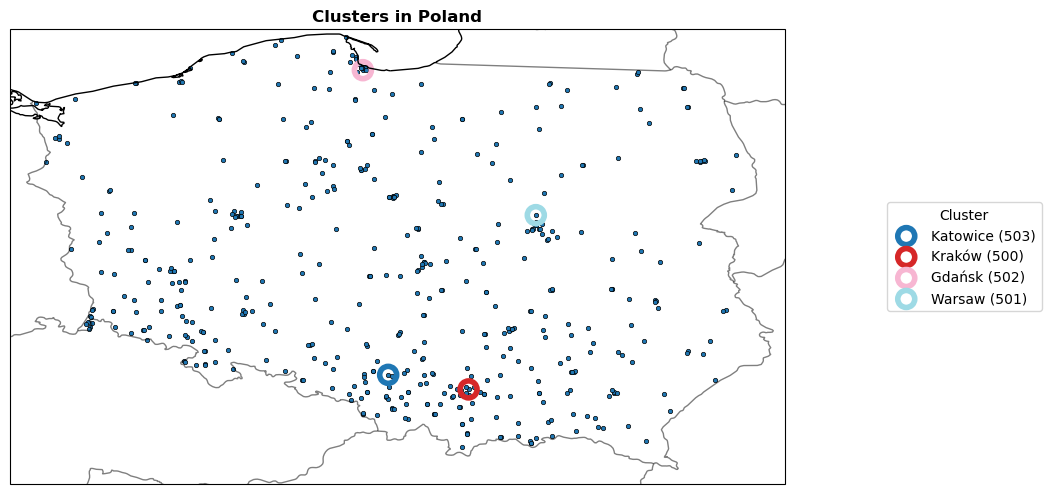

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 15), subplot_kw={'projection': ccrs.PlateCarree()})

ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)

sc = ax.scatter(stations['lon'], stations['lat'], s=10, edgecolor='k', linewidth=0.5, transform=ccrs.PlateCarree())
colors = plt.get_cmap('tab20', len(stations.cluster[stations.cluster.notnull()].unique())).colors

for i, cluster in enumerate(stations.cluster[stations.cluster.notnull()].unique()):
    cluster_stations = stations[stations.cluster == cluster]
    cluster_lon = cluster_stations["lon"].values[0]
    cluster_lat = cluster_stations["lat"].values[0]
    ax.scatter(cluster_lon, cluster_lat, s=150, transform=ccrs.PlateCarree(), 
               facecolor='none', 
               edgecolor=colors[i], 
               linewidth=4,
               label=f"{config["places"]["cluster_names"][cluster]} ({int(cluster)})")

bbox = config["regions"][region]["bbox"]
ax.set_xlim(bbox["min_lon"], bbox["max_lon"])
ax.set_ylim(bbox["min_lat"], bbox["max_lat"])

ax.set_title(f'Clusters in {region.capitalize()}', 
             fontweight='bold', fontsize=12)
plt.legend(loc="center right", bbox_to_anchor=(1.34, 0.5), title="Cluster")

plt.show()